<a href="https://colab.research.google.com/github/leee2682/pythonbasic/blob/main/20210615.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

In [ ]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [ ]:
dataset = pd.read_csv('iris.data', names = names)

In [ ]:
dataset

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X = dataset.iloc[:, :-1].values

In [ ]:
y = dataset.iloc[:, 4].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
# X_train = s.transform(X_train)
# X_test = s.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
print("정확도 : {}".format(accuracy_score(y_test, y_pred)))

정확도 : 1.0


In [ ]:
k = 10

acc_array = np.zeros(k)

for k in np.arange(1, k + 1, 1):
  classifier = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  acc = metrics.accuracy_score(y_test, y_pred)
  acc_array[k - 1] = acc

max_acc = np.amax(acc_array)
acc_list = list(acc_array)
k = acc_list.index(max_acc)

print("정확도", max_acc, "으로 최적의 k는", k + 1, "입니다.")

정확도 1.0 으로 최적의 k는 1 입니다.


In [ ]:
from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection

import tensorflow as tf
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [ ]:
iris = datasets.load_iris()
x_train, x_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size = 0.6, random_state = 42)

In [ ]:
svm = svm.SVC(kernel='linear', C = 1.0, gamma = 0.5)
svm.fit(x_train, y_train)
predictions = svm.predict(x_test)
score = metrics.accuracy_score(y_test, predictions)
print("정확도 : {0:f}".format(score))

정확도 : 0.988889


In [ ]:
import pandas as pd
# df = pd.read_csv('train.csv', index_col='PassengerId')
# print(df.head())

In [ ]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

KeyError: ignored

In [ ]:
df['Sex'] = df['Sex'].map({'male':0, 'gemale':1})

In [ ]:
df = df.dropna()

In [ ]:
X = df.drop('Survived', axis = 1)

In [ ]:
y = df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

In [ ]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns = ['Predicted Not Suvival', 'Predicted Survival'],
    index = ['True Not Survival', 'True Survival']
)

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=20)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    test_size=0.25, random_state=0)
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

In [ ]:
logisticRegr.predict(x_test[0].reshape(1,-1))
logisticRegr.predict(x_test[0:10])

In [ ]:
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

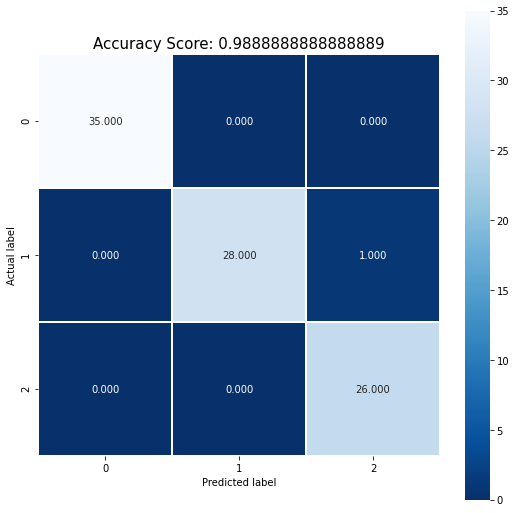

In [ ]:
import numpy as np
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15);
plt.show();

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [ ]:
dataset = pd.read_csv('weather.csv')

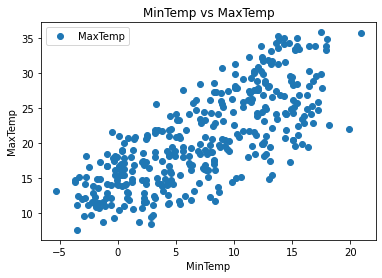

In [ ]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [ ]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,19.0,20.827608
1,11.8,19.820899
2,19.0,15.626275
3,21.8,19.485329
4,22.4,27.539007
...,...,...
69,12.5,11.683328
70,12.0,11.935006
71,20.9,16.632985
72,28.3,27.203437


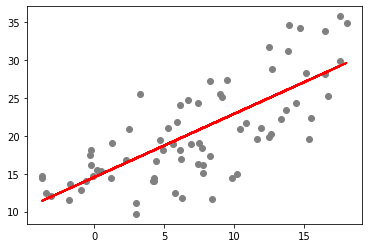

In [ ]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [ ]:
print('평균제곱법:', metrics.mean_squared_error(y_test, y_pred))
print('루트 평균제곱법:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

평균제곱법: 19.236582206702508
루트 평균제곱법: 4.385952827687788


In [ ]:
pca = decomposition.PCA(n_components=1)
pca_x = pca.fit_transform(x_std)

result = pd.DataFrame(pca_x, columns=['dog'])
result['y-axis'] = 0.0
result['label'] = Y

sns.lmplot('dog', 'y-axis', data=result, fit_reg=False,
           scatter_kws={"s":50}, hue='label');

NameError: ignored

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [ ]:
X = pd.read_csv('credit card.csv')
X = X.drop('CUST_ID', axis=1)
X.fillna(method='ffill', inplace=True)
print(X.head())

       BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT  TENURE
0    40.900749           0.818182  ...          0.000000      12
1  3202.467416           0.909091  ...          0.222222      12
2  2495.148862           1.000000  ...          0.000000      12
3  1666.670542           0.636364  ...          0.000000      12
4   817.714335           1.000000  ...          0.000000      12

[5 rows x 17 columns]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

X_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.312038,-0.106331,-0.181129,-0.152156,-0.148808,-0.198985,-0.343796,-0.289304,-0.301518,-0.287892,-0.202942,-0.217975,-0.409413,-0.225497,-0.130160,-0.224036,0.153753
1,0.219928,0.037539,-0.131224,-0.099751,-0.127038,0.728177,-0.341439,-0.189662,-0.256269,0.160403,0.030762,-0.165387,0.192455,0.228782,0.024353,0.065458,0.100798
2,0.126684,0.146785,-0.030505,0.030851,-0.128792,-0.132251,0.359775,0.757449,-0.259805,-0.191342,-0.134881,-0.030888,0.234046,-0.108741,-0.028363,-0.148900,0.102189
3,0.020571,-0.426063,0.097223,0.228832,-0.190449,-0.154451,-0.424878,-0.167299,-0.384185,-0.108474,-0.138062,-0.231084,0.346093,-0.250827,-0.041942,-0.220185,0.151110
4,-0.151630,0.218959,-0.195282,-0.146778,-0.192118,-0.197278,-0.428601,-0.168765,-0.387551,-0.285424,-0.201202,-0.233109,-0.382671,-0.153993,-0.110323,-0.222114,0.152435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.146906,0.103137,-0.066350,-0.071056,-0.026406,-0.092925,0.252792,-0.135103,0.234873,-0.134444,-0.094773,-0.069757,-0.191193,-0.096793,-0.068374,0.235693,-0.820733
8946,-0.151150,0.105477,-0.067009,-0.072668,-0.025006,-0.095033,0.258527,-0.138169,0.240202,-0.137494,-0.096923,-0.071340,-0.195531,-0.102486,-0.069925,-0.106997,-0.839354
8947,-0.156989,-0.039327,-0.085230,-0.075682,-0.062527,-0.098974,0.181198,-0.143898,0.161244,-0.143196,-0.100942,-0.082828,-0.203640,-0.120989,-0.069834,0.069801,-0.874162
8948,-0.154334,-0.038414,-0.097250,-0.073925,-0.094148,-0.093066,-0.253040,-0.140558,-0.189920,0.032626,-0.037901,-0.122568,-0.227375,-0.120236,-0.070536,0.068181,-0.853872


In [ ]:
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544826
2  0.330633  0.268879
3 -0.481657 -0.097615
4 -0.563512 -0.482505


In [ ]:
db_default = DBSCAN(eps=0.0375, min_samples=3).fit(X_principal)

In [ ]:
labels = db_default.labels_

In [ ]:
colours = {}
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

cvec = [colours[label] for label in labels]

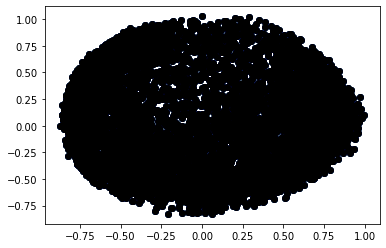

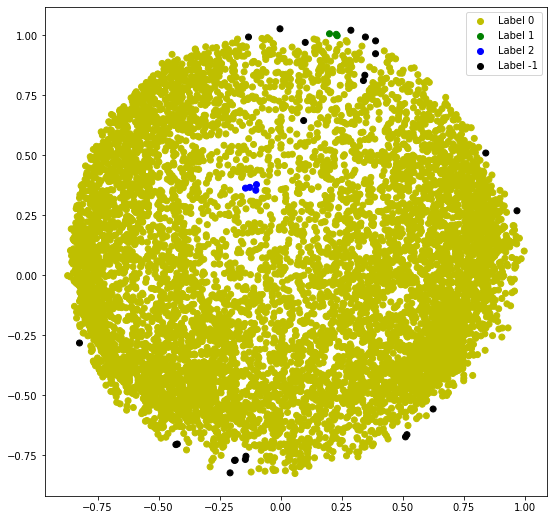

In [ ]:
r = plt.scatter(X_principal['P1'], X_principal['P2'], color='y');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color='g');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color='b');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color='k');

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)

plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
plt.show()

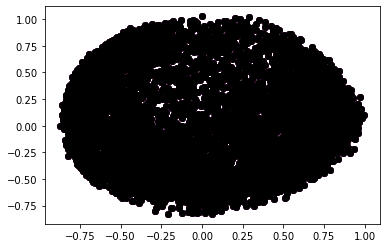

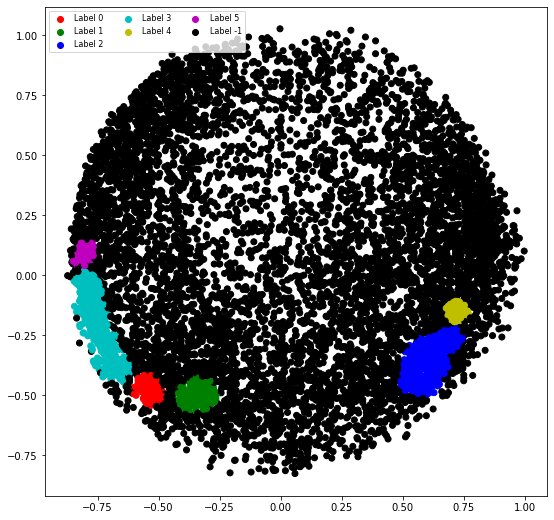

In [ ]:
db = DBSCAN(eps=0.0375, min_samples=50).fit(X_principal)
labels1 = db.labels_

colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels1]
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k']

r = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[0])
g = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[1])
b = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[2])
c = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[3])
y = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[4])
m = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[5])
k = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[6])

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)
plt.legend((r, g, b, c, y, m, k),
          ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'),
          scatterpoints=1,
          loc='upper left',
          ncol=3,
          fontsize=8)
plt.show()

In [ ]:
db = DBSCAN(eps=0.0375, min_samples=100).fit(X_principal)

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('sales data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [ ]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

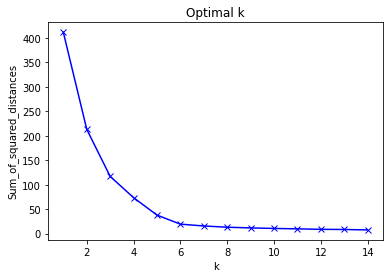

In [ ]:
Sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k')
plt.show()